<a href="https://colab.research.google.com/github/Vinit2702/Expt3/blob/master/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the text Data

In [1]:
# Installing kaggle 
!pip install -q kaggle

In [2]:
# To upload kaggle json file from the local system
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vinitkhedu","key":"048a9c2f7dd036b48fbf7807cdd1ba5a"}'}

In [3]:
# Create a kaggle directory
!mkdir ~/.kaggle

In [4]:
# Copy the kaggle.json to folder created 
!cp kaggle.json ~/.kaggle/

In [5]:
# Permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d jillanisofttech/fake-or-real-news

 44% 5.00M/11.5M [00:00<00:00, 32.7MB/s]
100% 11.5M/11.5M [00:00<00:00, 55.5MB/s]


In [7]:
!unzip fake-or-real-news.zip

Archive:  fake-or-real-news.zip
  inflating: fake_or_real_news.csv   


# Visualizing the text dataset

In [8]:
import pandas as pd

news_df = pd.read_csv("/content/fake_or_real_news.csv")
news_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [9]:
news_df["label"] = news_df["label"].replace({"REAL":1, "FAKE":0})
news_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [10]:
news_df["label"].dtype

dtype('int64')

In [11]:
news_df.keys()

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [12]:
news_df.drop("Unnamed: 0", axis=1, inplace=True)
news_df.drop("title", axis=1, inplace=True)


In [13]:
# Split the data into X and Y

X = news_df.drop("label", axis=1)
Y = news_df["label"]

In [14]:
# Split the data into train and test set
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X.to_numpy(), 
                                                    Y.to_numpy(), 
                                                    test_size=0.2,
                                                    random_state=42)


In [15]:
len(X_train), len(Y_train), len(X_test), len(Y_test)

(5068, 5068, 1267, 1267)

In [16]:
# Check the first 10 examples
X_train[:10], Y_train[:10]

(array([['Donald Trump received a key endorsement for his immigration platform: Sen. Jeff Sessions, one of the strongest proponents in Congress of restricting immigration.'],
        ['Nina November 6, 2016 @ 2:39 pm \nPolish government and common people (except liberal and leftist opposition which lost everything in last year election) pray for Trump to be the president of USA. Dubi November 6, 2016 @ 2:25 pm \nWith bitches like this hillary fan America is lost if she wins. She is lucky I wasn’t that cop who has the patience of Job, because I don’t! GO TRUMP! ! ! \nWATCH: Video of Obnoxious Trump-Hater Getting Justice Explodes…6 MILLION Views This obnoxious Donald J. Trump hater has gone viral in a major way, and it’s not good. Here’s what happened to this anti-Trumper on video that has netted her six million views… This is AWESOME! Read more…'],
        ["Time: Investigating Hillary is an Attack on All Women November 1, 2016 \nGood morning. It's Tuesday. \nWho's up for another silly 

# Text Vectorization (tokenization)

In [17]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None,
                                    pad_to_max_tokens=False)

In [18]:
# Find the average number of tokens in the training set
avg_tokens = round(sum([len(str(i).split()) for i in X_train])/len(X_train))
print("Average number of tokens in training set:", avg_tokens)


Average number of tokens in training set: 759


In [19]:
# Setup the text vectorization variables
max_vocab_length = 10000 #max number of words to have in our vocabulary
max_length = 759 # max length od our sequence will be 

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [20]:
# Fit the text vectorizer to the training data
text_vectorizer.adapt(X_train)

In [21]:
# Create a sample sentence and tokenize it 
sample_sentence = "There is a man called Virat Kohli who is the new president of India"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 759), dtype=int64, numpy=
array([[  60,    9,    6,  274,  214,    1,    1,   32,    9,    2,   58,
          69,    4, 1648,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [22]:
# Choose the random sentence from the training dataset and tokenize it 
import random
random_sentence = random.choice(X_train)
print(f"Original text: \n {random_sentence}\n Vectorized text:\n {text_vectorizer([random_sentence])}")

Original text: 
 ['Be the First to Comment! Leave a Reply Click here to get more info on formatting (1) Leave the name field empty if you want to post as Anonymous. It\'s preferable that you choose a name so it becomes clear who said what. E-mail address is not mandatory either. The website automatically checks for spam. Please refer to our moderation policies for more details. We check to make sure that no comment is mistakenly marked as spam. This takes time and effort, so please be patient until your comment appears. Thanks. (2) 10 replies to a comment are the maximum. (3) Here are formating examples which you can use in your writing:<b>bold text</b> results in bold text <i>italic text</i> results in italic text (You can also combine two formating tags with each other, for example to get bold-italic text.)<em>emphasized text</em> results in emphasized text <strong>strong text</strong> results in strong text <q>a quote text</q> results in a quote text (quotation marks are added autom

In [23]:
# Get the unique words in our vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all the unique words in the training data
print(f"Most common words: {words_in_vocab[:10]}")
print(f"Least common words: {words_in_vocab[-5:]}")
print(f"Number of words in the vocab: {len(words_in_vocab)}")

Most common words: ['', '[UNK]', 'the', 'to', 'of', 'and', 'a', 'in', 'that', 'is']
Least common words: ['memoir', 'maximize', 'matches', 'maryamiyyah', 'marginalized']
Number of words in the vocab: 10000


# Creating an Embedding Layer

To make our embedding, we are going to use TensorFlow's embedding layer 

The parameters we care most about for our embedding layer:

* `input_dims`: the size of the vocabulary 
* `output_dims`: the size of the output embedding vector, for example, a value of 100 would be 100 words long
* `input_length`: length of the sequences being passed to the embedding layer

In [24]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=len(words_in_vocab),
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

In [25]:
embedding

In [26]:
# Get the random sentences from the training set
random_sentence = random.choice(X_train)
print(f"Original Text:\n {random_sentence}\n\n Embedding version:")

# Embed the random sentences (turn it into the dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original Text:
 ['The Clinton campaign blasted the FBI director, James Comey, for “jaw-dropping” double standards on Monday after claims that he had sought to withhold evidence of Russian support for Donald Trump for fear of influencing next week’s US election.\n\nIn a sharp escalation of their unprecedented war of words with federal law enforcement authorities, Clinton’s key aides contrasted this apparent caution with Comey’s controversial decision to release new details of its investigation into Clinton’s private email server to lawmakers on Friday.\n\n“It is impossible to view this as anything less than a blatant double standard,” her campaign manager, Robby Mook, told reporters, claiming the decision “defied all logic”, especially as other intelligence agencies had favoured disclosure of suspected Russian involvement.\n\n“Through these two decisions he shows he favours acting alone and without consulting … these are not the hallmarks of a responsible investigation,” added Mook.\n\n

<tf.Tensor: shape=(1, 759, 128), dtype=float32, numpy=
array([[[ 0.03081545, -0.03352624, -0.00444466, ...,  0.0317281 ,
         -0.01032395,  0.03891542],
        [ 0.03455133,  0.0320583 , -0.02464421, ..., -0.01820944,
          0.0448617 , -0.02527204],
        [-0.04127326,  0.02899048,  0.00280672, ..., -0.01528386,
          0.03881362,  0.02233691],
        ...,
        [ 0.03466613, -0.04868754, -0.00080075, ..., -0.0272495 ,
          0.04967478, -0.04000904],
        [ 0.00148825,  0.03039411,  0.03158665, ...,  0.00665032,
         -0.02782434, -0.0437035 ],
        [ 0.04226999, -0.04213995,  0.01571597, ..., -0.02070425,
          0.00881185,  0.0358429 ]]], dtype=float32)>

In [27]:
# Check out single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 3.08154486e-02, -3.35262418e-02, -4.44465876e-03, -3.44345719e-03,
         3.86944674e-02,  3.48470844e-02, -2.96652559e-02,  2.29671858e-02,
         3.72599252e-02, -1.93647277e-02, -2.95871496e-02, -2.90504582e-02,
         3.52735445e-03, -3.72930989e-02, -2.51914617e-02, -2.87126433e-02,
        -3.25446613e-02, -4.74015586e-02, -2.43320111e-02,  8.25933367e-03,
        -3.68746296e-02,  3.18134092e-02, -1.65628307e-02,  1.72508880e-03,
         1.43405236e-02,  2.80270725e-03,  3.40561941e-03, -3.81340384e-02,
         2.06369199e-02, -1.54307261e-02,  4.59750630e-02,  1.28983893e-02,
        -2.92456038e-02, -1.42949000e-02,  1.19074807e-02, -2.84015182e-02,
         2.15475447e-02, -4.43179868e-02,  3.39653231e-02, -2.09831838e-02,
         5.33374399e-03,  4.28171046e-02, -3.87776643e-04, -3.58333103e-02,
         2.20402963e-02, -8.71545076e-03, -3.75754833e-02,  8.30372423e-03,
        -9.43649560e-04, -4.47776169e-0

# Modelling a text dataset 

# `Model 0`: Naive Bayes(Baseline)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline 

# Create tokenization and modelling pipeline 
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(X_train.ravel(), Y_train.ravel())

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [29]:
# Evaluate the baseline model_0
baseline_score = model_0.score(X_test.ravel(), Y_test.ravel())
baseline_score*100

81.68902920284135

In [30]:
# Make predictions 
baseline_preds = model_0.predict(X_test.ravel())
baseline_preds[:10]

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [31]:
# Creating a evaluation function for our model experiment

import sklearn as sk
def metrics(y_true, y_preds):
  accuracy = sk.metrics.accuracy_score(y_true, y_preds) *100
  precision = sk.metrics.precision_score(y_true, y_preds) * 100
  recall = sk.metrics.recall_score(y_true, y_preds) * 100
  f1 = sk.metrics.f1_score(y_true, y_preds) * 100

  metrics_dict = {"Accuracy": accuracy,
                  "Precision": precision,
                  "Recall": recall,
                  "F1-score": f1}
  return metrics_dict

In [32]:
# Get the baseline results
baseline_results = metrics(Y_test, baseline_preds)
baseline_results


{'Accuracy': 81.68902920284135,
 'Precision': 73.69033760186264,
 'Recall': 99.06103286384976,
 'F1-score': 84.51268357810414}

# `Model_1`: A simple dense model

In [33]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1, ), dtype=tf.string) # inputs are 1D strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # Create an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x) # condense the feature vector for each token to one vector
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")


In [34]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 759)              0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 759, 128)          1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [35]:
# Compile the model 
model_1.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])
# Fit the model
hist_1 = model_1.fit(X_train,
                     Y_train,
                     epochs=5,
                     validation_data=(X_test, Y_test),
                     )

Epoch 1/5
159/159 [==============================] - 39s 199ms/step - loss: 0.6375 - accuracy: 0.6669 - val_loss: 0.5729 - val_accuracy: 0.7174
Epoch 2/5
159/159 [==============================] - 29s 186ms/step - loss: 0.5181 - accuracy: 0.7936 - val_loss: 0.4403 - val_accuracy: 0.8508
Epoch 3/5
159/159 [==============================] - 23s 142ms/step - loss: 0.3990 - accuracy: 0.8621 - val_loss: 0.3523 - val_accuracy: 0.8627
Epoch 4/5
159/159 [==============================] - 15s 98ms/step - loss: 0.3231 - accuracy: 0.8794 - val_loss: 0.3058 - val_accuracy: 0.8761
Epoch 5/5
159/159 [==============================] - 12s 76ms/step - loss: 0.2745 - accuracy: 0.8966 - val_loss: 0.2734 - val_accuracy: 0.8871


In [36]:
# Check the results
model_1.evaluate(X_test, Y_test)

40/40 [==============================] - 0s 6ms/step - loss: 0.2734 - accuracy: 0.8871


[0.27335309982299805, 0.8871349692344666]

In [37]:
# Make some predictions and evaluate them
model_1_pred_probs = model_1.predict(X_test)
model_1_pred_probs[0]

40/40 [==============================] - 0s 6ms/step


array([0.00954304], dtype=float32)

In [38]:
# Look at the first 10 predictions
model_1_pred_probs[:10]

array([[0.00954304],
       [0.04829321],
       [0.02791428],
       [0.33956462],
       [0.14709203],
       [0.08165243],
       [0.6031534 ],
       [0.24301988],
       [0.9746742 ],
       [0.27930662]], dtype=float32)

In [39]:
model_1_pred_probs.shape

(1267, 1)

In [40]:
# Convert the model prediction probabilities to label format'
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0.], dtype=float32)>

In [41]:
# Calculate our model 1 results
model_1_results = metrics(Y_test, model_1_preds)
model_1_results

{'Accuracy': 88.71349644830308,
 'Precision': 93.05555555555556,
 'Recall': 83.8810641627543,
 'F1-score': 88.23045267489714}

# `Model_2`: LSTM(RNN)

In [42]:
# Create a LSTM model 
from tensorflow.keras import layers

inputs = layers.Input(shape=(1, ), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [43]:
# Get the summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 759)              0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 759, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [44]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
hist_2 = model_2.fit(X_train,
                     Y_train,
                     epochs=5,
                     validation_data=(X_test, Y_test),
                     )

Epoch 1/5
159/159 [==============================] - 35s 204ms/step - loss: 0.5440 - accuracy: 0.7464 - val_loss: 0.5611 - val_accuracy: 0.7837
Epoch 2/5
159/159 [==============================] - 26s 165ms/step - loss: 0.6107 - accuracy: 0.6606 - val_loss: 0.6119 - val_accuracy: 0.6575
Epoch 3/5
159/159 [==============================] - 21s 131ms/step - loss: 0.5483 - accuracy: 0.7186 - val_loss: 0.5358 - val_accuracy: 0.7024
Epoch 4/5
159/159 [==============================] - 18s 116ms/step - loss: 0.3943 - accuracy: 0.8086 - val_loss: 0.2978 - val_accuracy: 0.9140
Epoch 5/5
159/159 [==============================] - 18s 113ms/step - loss: 0.3043 - accuracy: 0.8962 - val_loss: 0.2856 - val_accuracy: 0.9053


In [45]:
# Make predictions with LSTM Model 
model_2_pred_probs = model_2.predict(X_test)
model_2_pred_probs[:10]

40/40 [==============================] - 1s 17ms/step


array([[0.02490178],
       [0.03735523],
       [0.04097269],
       [0.03735523],
       [0.03735523],
       [0.14616205],
       [0.91454625],
       [0.03735523],
       [0.9665522 ],
       [0.03735523]], dtype=float32)

In [46]:
# Convert the model_2_pred_probs into labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0.], dtype=float32)>

In [47]:
# Calculate the model_2 results
model_2_results = metrics(Y_test,
                          model_2_preds)
model_2_results

{'Accuracy': 90.52880820836621,
 'Precision': 88.44444444444444,
 'Recall': 93.42723004694837,
 'F1-score': 90.86757990867581}

# `Model_3`: GRU

In [48]:
# Build RNN using the GRU cell
from tensorflow.keras import layers 
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x) 
x = layers.GRU(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [49]:
# Get the summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 759)              0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 759, 128)          1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                       

In [50]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
hist_3 = model_3.fit(X_train,
                     Y_train,
                     epochs=5,
                     validation_data=(X_test, Y_test),
                     )

Epoch 1/5
159/159 [==============================] - 34s 196ms/step - loss: 0.5563 - accuracy: 0.7121 - val_loss: 0.4421 - val_accuracy: 0.7782
Epoch 2/5
159/159 [==============================] - 27s 172ms/step - loss: 0.3905 - accuracy: 0.8506 - val_loss: 0.6637 - val_accuracy: 0.6093
Epoch 3/5
159/159 [==============================] - 22s 136ms/step - loss: 0.5991 - accuracy: 0.6582 - val_loss: 0.5793 - val_accuracy: 0.6819
Epoch 4/5
159/159 [==============================] - 17s 106ms/step - loss: 0.4674 - accuracy: 0.7366 - val_loss: 0.4757 - val_accuracy: 0.7388
Epoch 5/5
159/159 [==============================] - 14s 88ms/step - loss: 0.2784 - accuracy: 0.8621 - val_loss: 0.1771 - val_accuracy: 0.9345


In [51]:
# Make some predictions with our GRU model
model_3_pred_probs = model_3.predict(X_test)
model_3_pred_probs[:10]

40/40 [==============================] - 1s 18ms/step


array([[0.03376852],
       [0.02015942],
       [0.02723755],
       [0.02912005],
       [0.02319767],
       [0.04919617],
       [0.6077939 ],
       [0.02294972],
       [0.9983028 ],
       [0.06828299]], dtype=float32)

In [52]:
# Convert the model_3 preds probs to label
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0.], dtype=float32)>

In [53]:
# Calculate model_3 results
model_3_results = metrics(Y_test,
                          model_3_preds)
model_3_results

{'Accuracy': 93.44909234411996,
 'Precision': 91.99395770392749,
 'Recall': 95.30516431924883,
 'F1-score': 93.62029208301307}

# `Model_4`: Bidirectional RNN

In [54]:
# Build a bidirectional RNN
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional_RNN")


In [55]:
# Get the summary
model_4.summary()

Model: "model_4_bidirectional_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 759)              0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 759, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params:

In [56]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
hist_4 = model_4.fit(X_train,
                     Y_train,
                     epochs=5,
                     validation_data=(X_test, Y_test),
                     )

Epoch 1/5
159/159 [==============================] - 39s 220ms/step - loss: 0.1996 - accuracy: 0.9284 - val_loss: 0.1937 - val_accuracy: 0.9305
Epoch 2/5
159/159 [==============================] - 27s 174ms/step - loss: 0.1212 - accuracy: 0.9538 - val_loss: 0.2084 - val_accuracy: 0.9179
Epoch 3/5
159/159 [==============================] - 22s 139ms/step - loss: 0.0787 - accuracy: 0.9743 - val_loss: 0.1744 - val_accuracy: 0.9440
Epoch 4/5
159/159 [==============================] - 20s 124ms/step - loss: 0.0578 - accuracy: 0.9813 - val_loss: 0.2090 - val_accuracy: 0.9211
Epoch 5/5
159/159 [==============================] - 16s 100ms/step - loss: 0.0451 - accuracy: 0.9866 - val_loss: 0.2116 - val_accuracy: 0.9345


In [57]:
# Make predictions for the bidirectional model
model_4_pred_probs = model_4.predict(X_test)
model_4_pred_probs[:10]

40/40 [==============================] - 2s 25ms/step


array([[2.5209945e-02],
       [6.5072346e-03],
       [3.4578287e-04],
       [6.8194671e-03],
       [1.8932699e-03],
       [7.4537873e-04],
       [2.0071930e-01],
       [9.4893313e-04],
       [9.9998426e-01],
       [3.1423338e-03]], dtype=float32)

In [58]:
# Convert the pred probs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)>

In [59]:
# Calculate the results of our bidirectional model
model_4_results = metrics(Y_test,
                          model_4_preds)
model_4_results

{'Accuracy': 93.44909234411996,
 'Precision': 94.69453376205787,
 'Recall': 92.17527386541471,
 'F1-score': 93.41792228390166}

# Testing CNN for text data

# `Model_5`: Conv1D

In [60]:
# Test our embedding layer, Conv1D layer and Max Pooling

embedding_test = embedding(text_vectorizer(["This is a test sentence"]))
conv1D = layers.Conv1D(filters=32,
                       kernel_size=5,
                       activation="relu",
                       padding="valid")

conv1D_output = conv1D(embedding_test) 
max_pool = layers.GlobalMaxPooling1D()
max_pool_outputs = max_pool(conv1D_output)

embedding_test.shape, conv1D_output.shape, max_pool_outputs.shape

(TensorShape([1, 759, 128]), TensorShape([1, 755, 32]), TensorShape([1, 32]))

In [61]:
embedding_test

<tf.Tensor: shape=(1, 759, 128), dtype=float32, numpy=
array([[[ 0.20270194,  0.36075422, -0.33892742, ...,  0.4943913 ,
          0.18254867, -0.06758714],
        [ 0.03689335,  0.144692  , -0.15466884, ...,  0.22882132,
          0.02940286,  0.00617046],
        [-0.23114643, -0.18189666,  0.16535577, ..., -0.205018  ,
         -0.2012199 ,  0.16501026],
        ...,
        [-0.04013627,  0.02376723, -0.01676841, ...,  0.02925005,
         -0.02517498, -0.05252654],
        [-0.04013627,  0.02376723, -0.01676841, ...,  0.02925005,
         -0.02517498, -0.05252654],
        [-0.04013627,  0.02376723, -0.01676841, ...,  0.02925005,
         -0.02517498, -0.05252654]]], dtype=float32)>

In [62]:
conv1D_output

<tf.Tensor: shape=(1, 755, 32), dtype=float32, numpy=
array([[[0.07477159, 0.08513016, 0.        , ..., 0.13437162,
         0.05958943, 0.08208279],
        [0.        , 0.        , 0.1305309 , ..., 0.        ,
         0.02059931, 0.        ],
        [0.        , 0.        , 0.11705164, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.04768194, 0.        , 0.01368017, ..., 0.        ,
         0.02182761, 0.        ],
        [0.04768194, 0.        , 0.01368017, ..., 0.        ,
         0.02182761, 0.        ],
        [0.04768194, 0.        , 0.01368017, ..., 0.        ,
         0.02182761, 0.        ]]], dtype=float32)>

In [63]:
max_pool_outputs

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.07477159, 0.08513016, 0.1305309 , 0.19537029, 0.39472723,
        0.32177258, 0.12408724, 0.02977894, 0.20620339, 0.2508885 ,
        0.        , 0.05940378, 0.05073293, 0.        , 0.10688633,
        0.25041208, 0.36306217, 0.39606774, 0.25565243, 0.        ,
        0.13345253, 0.06025103, 0.07340831, 0.41706228, 0.05390992,
        0.21498774, 0.17452347, 0.15290949, 0.23885179, 0.13437162,
        0.05958943, 0.08208279]], dtype=float32)>

In [64]:
# Create a 1D convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") 
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_conv1D")


In [65]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
hist_5 = model_5.fit(X_train, 
                     Y_train,
                     epochs=5,
                     validation_data=(X_test, Y_test),
                     )

Epoch 1/5
159/159 [==============================] - 28s 159ms/step - loss: 0.2285 - accuracy: 0.9152 - val_loss: 0.2154 - val_accuracy: 0.9148
Epoch 2/5
159/159 [==============================] - 19s 118ms/step - loss: 0.1582 - accuracy: 0.9394 - val_loss: 0.2068 - val_accuracy: 0.9282
Epoch 3/5
159/159 [==============================] - 17s 108ms/step - loss: 0.1204 - accuracy: 0.9554 - val_loss: 0.2064 - val_accuracy: 0.9234
Epoch 4/5
159/159 [==============================] - 15s 96ms/step - loss: 0.0865 - accuracy: 0.9714 - val_loss: 0.1897 - val_accuracy: 0.9298
Epoch 5/5
159/159 [==============================] - 11s 70ms/step - loss: 0.0580 - accuracy: 0.9858 - val_loss: 0.1938 - val_accuracy: 0.9258


In [66]:
# Make some predictions with conv1D model
model_5_pred_probs = model_5.predict(X_test)
model_5_pred_probs[:10]

40/40 [==============================] - 0s 6ms/step


array([[1.41533045e-02],
       [1.55599811e-03],
       [2.07573026e-02],
       [1.59914125e-05],
       [8.40566008e-06],
       [3.20368230e-01],
       [5.85700631e-01],
       [3.18227285e-05],
       [9.76571321e-01],
       [5.73910296e-01]], dtype=float32)

In [67]:
# Convert model 5 pred probs to label
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 1., 1.], dtype=float32)>

In [68]:
# Evaluate the model 5 predictions
model_5_results = metrics(Y_test,
                          model_5_preds)
model_5_results

{'Accuracy': 92.5808997632202,
 'Precision': 93.46092503987241,
 'Recall': 91.70579029733959,
 'F1-score': 92.57503949447077}

# `Model 6`: Tensorflow Hub Pretrained Sentence Encoder

In [69]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                        "When you call the USE on a sentence, it turns it into numbers"])
print(embed_samples[0][:50])

tf.Tensor(
[-0.02373554 -0.03778899 -0.0055454  -0.00381855 -0.04025145  0.02595629
  0.01935928 -0.00203727  0.05029247  0.00520264 -0.08228376  0.05333052
  0.06480763  0.07542918  0.01254224 -0.08130664  0.01259611  0.02526177
 -0.02920272  0.01864131 -0.01844542  0.04170033  0.03297575  0.03366062
  0.06584937 -0.03050619 -0.00701076  0.01742079  0.06054207 -0.04512301
  0.00132934 -0.05745792  0.05909359  0.04803358  0.06251644  0.00143036
  0.02294566 -0.03021138 -0.08636472  0.00142817 -0.02772044 -0.01551558
  0.01321827  0.06576098  0.06217813  0.03272587 -0.00889022 -0.01994445
  0.02182555 -0.05619378], shape=(50,), dtype=float32)


In [70]:
embed_samples[0].shape

TensorShape([512])

In [71]:
# Create a keras layer using USE pretrained layer from TensorFlow Hub

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype="string",
                                        trainable=False,
                                        name="USE")

In [72]:
# Create a model using Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
],name="model_6_USE")

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=['accuracy'])


In [73]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [74]:
# Train the model 6 
hist_6 = model_6.fit(X_train,
                     Y_train,
                     epochs=5,
                     validation_data=(X_test, Y_test),
                     )

Epoch 1/5
159/159 [==============================] - 25s 143ms/step - loss: 0.4905 - accuracy: 0.8047 - val_loss: 0.3573 - val_accuracy: 0.8493
Epoch 2/5
159/159 [==============================] - 21s 134ms/step - loss: 0.3206 - accuracy: 0.8668 - val_loss: 0.3071 - val_accuracy: 0.8635
Epoch 3/5
159/159 [==============================] - 24s 149ms/step - loss: 0.2840 - accuracy: 0.8816 - val_loss: 0.2873 - val_accuracy: 0.8761
Epoch 4/5
159/159 [==============================] - 23s 143ms/step - loss: 0.2679 - accuracy: 0.8909 - val_loss: 0.2813 - val_accuracy: 0.8840
Epoch 5/5
159/159 [==============================] - 24s 148ms/step - loss: 0.2572 - accuracy: 0.8915 - val_loss: 0.2703 - val_accuracy: 0.8856


In [75]:
# Make predictions with USE TF hub model
model_6_pred_probs = model_6.predict(X_test)
model_6_pred_probs[:10]

40/40 [==============================] - 5s 127ms/step


array([[0.00177713],
       [0.10047907],
       [0.04949477],
       [0.16965748],
       [0.01278246],
       [0.52259994],
       [0.47958964],
       [0.02061709],
       [0.9158836 ],
       [0.01590537]], dtype=float32)

In [76]:
# Convert the predictions prob to labbels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0.], dtype=float32)>

In [77]:
# Calculate model_6 metrics
model_6_results = metrics(Y_test,
                          model_6_preds)
model_6_results

{'Accuracy': 88.55564325177585,
 'Precision': 88.59375,
 'Recall': 88.73239436619718,
 'F1-score': 88.66301798279908}

# Comparing the performance of each of the models



In [80]:
# Combine the models results into a dataframe
results = pd.DataFrame({"Baseline": baseline_results,
                        "Simple Dense": model_1_results,
                        "LSTM": model_2_results,
                        "GRU": model_3_results,
                        "Bidirectional": model_4_results,
                        "Conv1D": model_5_results,
                        "USE_encoder": model_6_results})

results = results.transpose()
results

,Accuracy,Precision,Recall,F1-score
Baseline,81.689029,73.690338,99.061033,84.512684
Simple Dense,88.713496,93.055556,83.881064,88.230453
LSTM,90.528808,88.444444,93.427230,90.867580
GRU,93.449092,91.993958,95.305164,93.620292
Bidirectional,93.449092,94.694534,92.175274,93.417922
Conv1D,92.580900,93.460925,91.705790,92.575039
USE_encoder,88.555643,88.593750,88.732394,88.663018


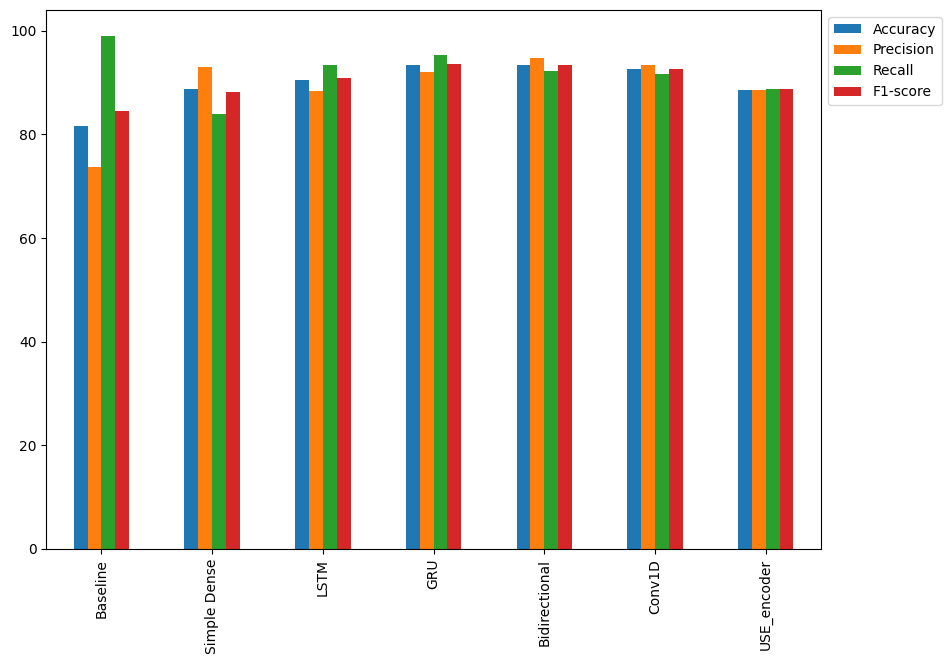

In [83]:
# Plot and compare all the model results
results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

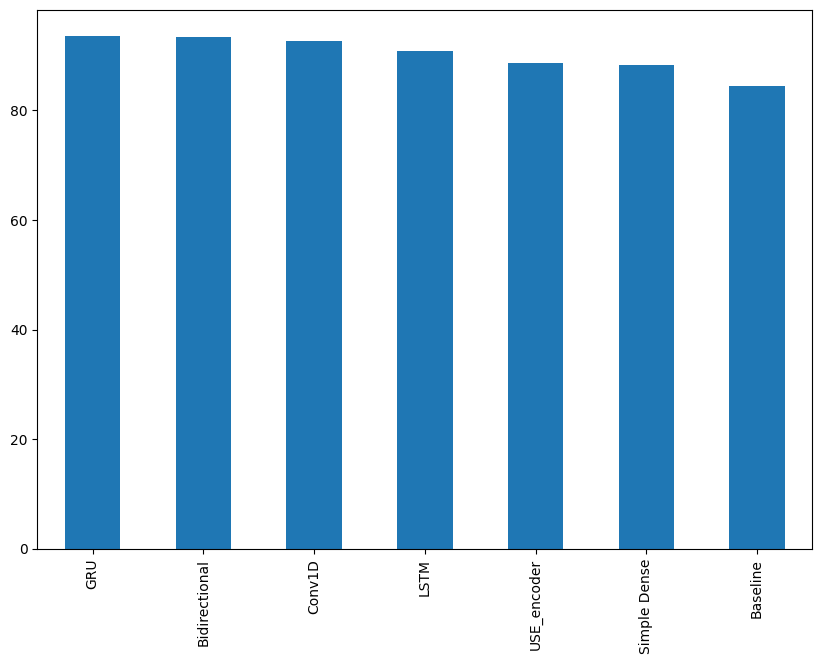

In [84]:
# Sorting all the model resutls by F1
results.sort_values("F1-score", ascending=False)["F1-score"].plot(kind="bar", figsize=(10, 7));

# Making predictions on the test dataset

In [108]:
# Make predictions on the test dataset and visualizing them
import random
test_sentences = X_test.tolist()
test_samples = random.sample(test_sentences, 5)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_3.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n {test_sample}\n")
  print("------------------------\n")

1/1 [==============================] - 0s 43ms/step
Pred: 1, Prob: 0.8541103601455688
Text:
 ['Clinton And The DNC: A Crisis Not Merely Survived, But Transcended\n\nWhen all was said and done, Team Hillary had to be pretty happy. Their four nights in Philadelphia turned out better than almost anyone expected.\n\nThursday night featured an orchestrated symphony of praise for Hillary Clinton and a precision-bombing of her opponent, Donald Trump.\n\nClinton\'s own remarks at the conclusion will not enter the pantheon of great American prose or political rhetoric. But no one had been reserving a place there. More importantly, she provided a fitting conclusion to the proceedings, meeting her own mark and cutting a convincing figure as the nation\'s first female president.\n\nThink of it this way: She got it done. No, she didn\'t seem to be having fun doing it. Not half as much as Barack Obama did when setting the table for her the night before (and not to mention her husband, Bill, on Tuesd